<a href="https://colab.research.google.com/github/Dpgofast/DS-Sprint-02-Storytelling-With-Data/blob/master/LS_DS_123_Make_explanatory_visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Choose appropriate visualizations


Recreate this [example by FiveThirtyEight:](https://fivethirtyeight.com/features/al-gores-new-movie-exposes-the-big-flaw-in-online-movie-ratings/)

![](https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png?w=575)

Using this data:

https://github.com/fivethirtyeight/data/tree/master/inconvenient-sequel

### Stretch goals

Recreate more examples from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

For example:
- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) ([`altair`](https://altair-viz.github.io/gallery/index.html#maps))
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) ([`statsmodels`](https://www.statsmodels.org/stable/index.html))

In [0]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 


In [0]:
df= pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')

In [4]:
df. head()

,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,...,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
0,2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,...,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
1,2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,...,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2,2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,...,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
3,2017-07-17 12:28:33.495325,4,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,4.2,4.2,3,2,0,0,...,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
4,2017-07-17 12:28:33.722849,130,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.3,6.5,9,41,0,3,...,31.5,0.0,2.3,0.8,1.5,2.3,4.6,3.1,4.6,49.2


In [5]:
df.shape

(80053, 27)

In [0]:
# kill ellipsis to view data without break for column 80

pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [10]:
df.sample(1).T

,38841
timestamp,2017-08-14 21:30:06.324878
respondents,2267
category,IMDb users
link,http://www.imdb.com/title/tt6322922/ratings
average,5.1
mean,5.4
median,6
1_votes,945
2_votes,61
3_votes,37


In [0]:
df.timestamp = pd.to_datetime(df.timestamp)

In [17]:
df.timestamp.describe()

count                          80053
unique                         80053
top       2017-07-24 23:00:02.760781
freq                               1
first     2017-07-17 12:28:32.785639
last      2017-08-29 23:10:06.218251
Name: timestamp, dtype: object

In [0]:
df.set_index('timestamp', inplace= True)

In [19]:
df.head()

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,3,7,7,11,8,20,135,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,1,1,0,3,4,3,49,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
2017-07-17 12:28:33.495325,4,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
2017-07-17 12:28:33.722849,130,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.3,6.5,9,41,0,3,1,2,3,6,4,6,64,31.5,0.0,2.3,0.8,1.5,2.3,4.6,3.1,4.6,49.2


In [22]:
df['2017-08-29']

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-29 00:00:02.248882,1682,Males,http://www.imdb.com/title/tt6322922/ratings-male,5.3,5.3,6,671,50,29,12,42,79,107,90,83,519,39.9,3.0,1.7,0.7,2.5,4.7,6.4,5.4,4.9,30.9
2017-08-29 00:00:02.499363,257,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.3,10,53,3,4,4,4,5,14,13,26,131,20.6,1.2,1.6,1.6,1.6,1.9,5.4,5.1,10.1,51.0
2017-08-29 00:00:02.727204,15,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.5,5.3,5,7,0,0,0,1,0,1,0,0,6,46.7,0.0,0.0,0.0,6.7,0.0,6.7,0.0,0.0,40.0
2017-08-29 00:00:03.024270,13,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,5.3,5.9,7,5,0,0,0,1,0,1,0,0,6,38.5,0.0,0.0,0.0,7.7,0.0,7.7,0.0,0.0,46.2
2017-08-29 00:00:03.248207,2,Females under 18,http://www.imdb.com/title/tt6322922/ratings-fe...,1.0,1.0,1,2,0,0,0,0,0,0,0,0,0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-08-29 00:00:03.441529,450,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.4,6.6,8,117,3,6,7,17,24,35,28,23,190,26.0,0.7,1.3,1.6,3.8,5.3,7.8,6.2,5.1,42.2
2017-08-29 00:00:03.636825,402,Males Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-ma...,6.3,6.5,8,112,3,4,6,15,20,33,25,21,163,27.9,0.7,1.0,1.5,3.7,5.0,8.2,6.2,5.2,40.5
2017-08-29 00:00:03.839446,41,Females Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-fe...,7.1,7.9,10,4,0,2,1,2,2,2,3,2,23,9.8,0.0,4.9,2.4,4.9,4.9,4.9,7.3,4.9,56.1
2017-08-29 00:00:04.030663,771,Aged 30-44,http://www.imdb.com/title/tt6322922/ratings-age_3,5.6,5.6,7,287,21,12,4,21,36,53,38,49,250,37.2,2.7,1.6,0.5,2.7,4.7,6.9,4.9,6.4,32.4


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 80053 entries, 2017-07-17 12:28:32.785639 to 2017-08-29 23:10:06.218251
Data columns (total 26 columns):
respondents    80053 non-null int64
category       80053 non-null object
link           80053 non-null object
average        80053 non-null float64
mean           80053 non-null float64
median         80053 non-null int64
1_votes        80053 non-null int64
2_votes        80053 non-null int64
3_votes        80053 non-null int64
4_votes        80053 non-null int64
5_votes        80053 non-null int64
6_votes        80053 non-null int64
7_votes        80053 non-null int64
8_votes        80053 non-null int64
9_votes        80053 non-null int64
10_votes       80053 non-null int64
1_pct          80053 non-null float64
2_pct          80053 non-null float64
3_pct          80053 non-null float64
4_pct          80053 non-null float64
5_pct          80053 non-null float64
6_pct          80053 non-null float64
7_pct          80053 non-null fl

In [25]:
df.category.value_counts()

Males Aged 45+        4216
Aged 18-29            4216
Males Aged 30-44      4216
Males under 18        4216
Males                 4216
US users              4216
Females Aged 30-44    4216
Females Aged 18-29    4216
IMDb users            4216
Aged 45+              4216
Males Aged 18-29      4216
Non-US users          4216
Aged 30-44            4216
Females Aged 45+      4216
Females               4216
IMDb staff            4216
Aged under 18         4216
Top 1000 voters       4216
Females under 18      4165
Name: category, dtype: int64

In [26]:
df.link.value_counts()

http://www.imdb.com/title/tt6322922/ratings-age_1            4216
http://www.imdb.com/title/tt6322922/ratings-female_age_2     4216
http://www.imdb.com/title/tt6322922/ratings-female           4216
http://www.imdb.com/title/tt6322922/ratings-usa              4216
http://www.imdb.com/title/tt6322922/ratings-female_age_3     4216
http://www.imdb.com/title/tt6322922/ratings-age_4            4216
http://www.imdb.com/title/tt6322922/ratings-imdb_staff       4216
http://www.imdb.com/title/tt6322922/ratings-top_1000         4216
http://www.imdb.com/title/tt6322922/ratings-male_age_4       4216
http://www.imdb.com/title/tt6322922/ratings-male_age_2       4216
http://www.imdb.com/title/tt6322922/ratings-female_age_4     4216
http://www.imdb.com/title/tt6322922/ratings-age_3            4216
http://www.imdb.com/title/tt6322922/ratings                  4216
http://www.imdb.com/title/tt6322922/ratings-male             4216
http://www.imdb.com/title/tt6322922/ratings-male_age_3       4216
http://www

In [28]:
df[df.category=='IMDb users']

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-07-17 12:28:36.697246,678,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.4,5,304,14,8,5,9,10,18,24,30,256,44.8,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.8
2017-07-17 12:34:21.250099,678,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.4,5,304,14,8,5,9,10,18,24,30,256,44.8,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.8
2017-07-17 13:00:06.506688,678,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.4,5,304,14,8,5,9,10,18,24,30,256,44.8,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.8
2017-07-17 14:00:06.727742,679,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,305,14,8,5,9,10,18,24,30,256,44.9,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.7
2017-07-17 15:00:06.055125,679,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,305,14,8,5,9,10,18,24,30,256,44.9,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.7
2017-07-17 16:00:06.023053,679,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,305,14,8,5,9,10,18,24,30,256,44.9,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.7
2017-07-17 17:00:06.142993,679,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,305,14,8,5,9,10,18,24,30,256,44.9,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.7
2017-07-17 18:00:06.510891,680,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,306,14,8,5,9,10,18,24,30,256,45.0,2.1,1.2,0.7,1.3,1.5,2.6,3.5,4.4,37.6
2017-07-17 19:00:06.666467,680,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,306,14,8,5,9,10,18,24,30,256,45.0,2.1,1.2,0.7,1.3,1.5,2.6,3.5,4.4,37.6


In [0]:
lastday = df['2017-08-29']

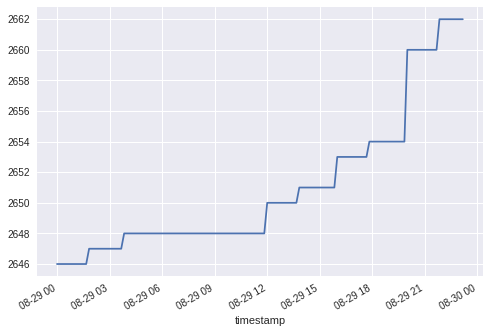

In [30]:
lastday[lastday.category=='IMDb users'].respondents. plot();

In [0]:
final = df.tail(1)

In [34]:
columns = ['1_pct','2_pct', '3_pct','4_pct','5_pct','6_pct','7_pct','8_pct','9_pct','10_pct']
final[columns]

,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,
2017-08-29 23:10:06.218251,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [0]:
final_data= final[columns].T
final_data.index= range(1,11)

In [0]:
plt.style.use('fivethirtyeight')

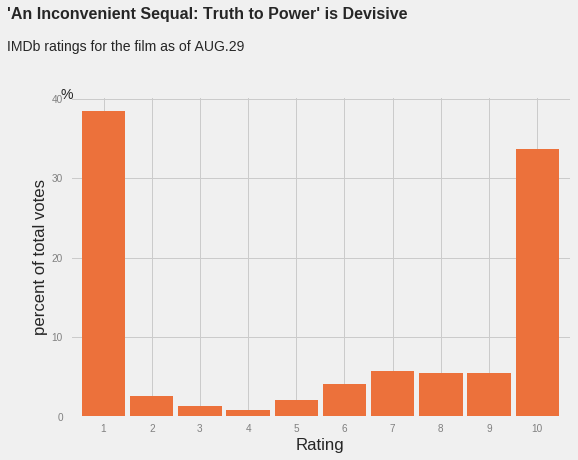

In [79]:
ax = final_data.plot.bar(color='#EC713B', width= 0.9)
ax.set(xlabel= 'Rating',ylabel='percent of total votes',yticks=range(0,50,10))
ax.text(x=-2,y=50,s="'An Inconvenient Sequal: Truth to Power' is Devisive", fontsize=16,fontweight='bold')
ax.text(x=-2,y=46, s='IMDb ratings for the film as of AUG.29')
ax.text(x=-0.90,y=40, s='%')
ax.tick_params(labelrotation=0,labelcolor='grey')
ax.legend().set_visible(False)

# **On to Candy power!**

# Header	Description
*chocolate*	-Does it contain chocolate?

*fruity*-	Is it fruit flavored?

*caramel*-	Is there caramel in the candy?

*peanutalmondy*-	Does it contain peanuts, peanut butter or almonds?

*nougat*	-Does it contain nougat?

*crispedricewafer*	-Does it contain crisped rice, wafers, or a cookie component?

*hard*	-Is it a hard candy?


*bar*	-Is it a candy bar?

*pluribus*-	Is it one of many candies in a bag or box?

*sugarpercent*-	The percentile of sugar it falls under within the data set.

*pricepercent*	-The unit price percentile compared to the rest of the set.

*winpercent*	-The overall win percentage according to 269,000 matchups.

In [0]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 

In [0]:
can_df= pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/candy-power-ranking/candy-data.csv')

In [121]:
can_df.head(20)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
5,Almond Joy,1,0,0,1,0,0,0,1,0,0.465,0.767,50.347546
6,Baby Ruth,1,0,1,1,1,0,0,1,0,0.604,0.767,56.914547
7,Boston Baked Beans,0,0,0,1,0,0,0,0,1,0.313,0.511,23.417824
8,Candy Corn,0,0,0,0,0,0,0,0,1,0.906,0.325,38.010963
9,Caramel Apple Pops,0,1,1,0,0,0,0,0,0,0.604,0.325,34.517681


In [122]:
can_df.describe()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.435294,0.447059,0.164706,0.164706,0.082353,0.082353,0.176471,0.247059,0.517647,0.478647,0.468882,50.316764
std,0.498738,0.500140,0.373116,0.373116,0.276533,0.276533,0.383482,0.433861,0.502654,0.282778,0.285740,14.714357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011000,0.011000,22.445341
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,0.255000,39.141056
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.465000,0.465000,47.829754
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.732000,0.651000,59.863998
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988000,0.976000,84.180290


In [0]:
rankdf=  pd.concat([ can_df['winpercent'],can_df['competitorname']], axis=1, keys=['winpercent','competitorname'])

In [124]:
rankdf.head(20)

,winpercent,competitorname
0,66.971725,100 Grand
1,67.602936,3 Musketeers
2,32.261086,One dime
3,46.116505,One quarter
4,52.341465,Air Heads
5,50.347546,Almond Joy
6,56.914547,Baby Ruth
7,23.417824,Boston Baked Beans
8,38.010963,Candy Corn
9,34.517681,Caramel Apple Pops


In [0]:
win_df= rankdf.sort_values(by=['winpercent'],ascending=True)

In [0]:
win_df.set_index('competitorname', inplace= True)

In [240]:
win_df.head()

,winpercent
competitorname,
Nik L Nip,22.445341
Boston Baked Beans,23.417824
Chiclets,24.524988
Super Bubble,27.303865
Jawbusters,28.127439


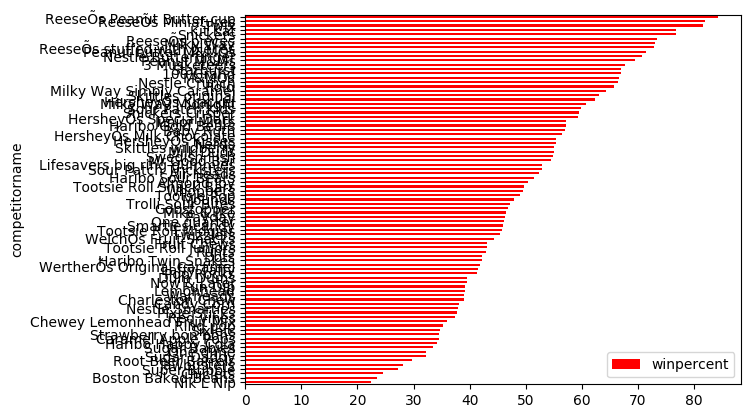

In [243]:
ax = win_df.plot.barh(color='r')
ax.tick_params(labelrotation=0)